In [2]:
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
import astropy.units as u
import schwimmbad
from astropy.io import fits
from astropy.table import Table


import os

import numpy as np
import matplotlib.pyplot as plt


AllAvgSimp = Table(fits.getdata('/home/cody/Binary Search/AllAvgSimp.fits',1))
AllVisSimp   = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits',1))

/home/cody/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO: 823 good samples after rejection sampling [thejoker.sampler.sampler]


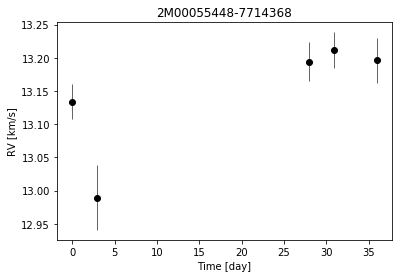

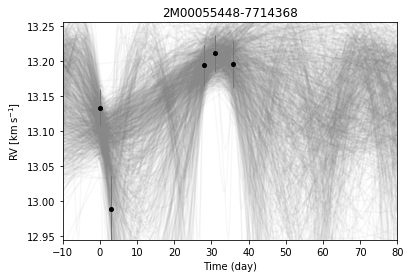

INFO: 7 good samples after rejection sampling [thejoker.sampler.sampler]


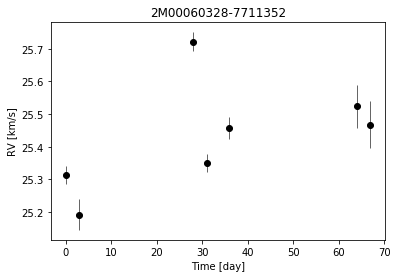

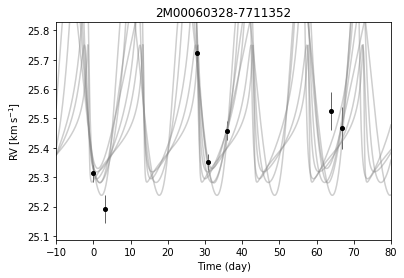

In [10]:
# Now I have my table of Visits I want to look at. But now I'd like a bunch of little arrays to make things 
# a little easier to plot and I'd like to only keep 'JD' and 'VHELIO' I can probably use the 'NVISITS' in teh AllAverage
# to help organize things.
#First step is make empty arrays using AllAvgSimp with length 'NVISITS


start = 0
end = 0
loop = 0
name = 0

for n in AllAvgSimp['NVISITS']:
    start = end
    end = end + n
    Date = AllVisSimp['JD'][start:end] - AllVisSimp['JD'][start]
    RV = AllVisSimp['VHELIO'][start:end]* u.km/u.s
    err = AllVisSimp['VRELERR'][start:end] * u.km/u.s
    data = RVData( t = Date, rv = RV, stddev = err)
    fix, ax = plt.subplots(1,1)
    ax = data.plot()
    ax.set_xlabel('Time [day]')
    ax.set_ylabel('RV [km/s]')
    thing = AllAvgSimp['APOGEE_ID'][name]
    plt.title(thing)
    
    from thejoker.sampler import JokerParams
    return_logprobs = True
    params = JokerParams(P_min = 8*u.day, P_max= 512*u.day)
    
    from thejoker.sampler import TheJoker
    joker = TheJoker(params)
    samples = joker.rejection_sample(data,n_prior_samples = 2**16,)
    
    #COuld make a plot of parmiters but I don't really want to 
    #fig, ax = plt.subplots(1,1)
    #ax.scatter(samples['P'].value, samples['K'].to(u.km/u.s).value, 
    #          marker ='.', color = 'k', alpha = 0.45)
    #ax.set_xlabel('$P$ [day]')
    #ax.set_ylabel('$K$ [km/s]')
    
    #ax.scatter(61.942, 1.3959, marker='o', color = '#31a354', zorder=-100)   
    
    fig, ax = plt.subplots(1,1)
    t_grid = np.linspace(-10,80,1024)
    plot_rv_curves(samples, t_grid, rv_unit=u.km/u.s, data = data,
                  ax = ax, plot_kwargs=dict(color='#888888'))
    plt.title(thing)
    plt.xlabel('Time (day)')
    plt.show(ax)
    #newpath = r'/home/cody/Binary Search/'+str(AllAvgSimp['APOGEE_ID'][name])
    #if not os.path.exists(newpath):
    #    os.makedirs(newpath)
    #Saving the plot with all the samples
    #name_holder = AllVisSimp['APOGEE_ID'][name]
    #fig.savefig('/home/cody/Binary Search/'+str(AllAvgSimp['APOGEE_ID'][name]) +'/P' +str(AllAvgSimp['APOGEE_ID'][name]) + '.png')
    
    #plt.close()
    #Save the paramiters that The Joker got for the orbit. The varable 'samples' is some weird type of object that I can't
    #figure out how\ to save. So instead lets turn it into a table, save that, and then it'll be easier to work wtih?
    #Samples_Table = Table()
    #Samples_Table['P'] = samples['P']
    #Samples_Table['M0'] = samples['M0']
    #Samples_Table['e'] = samples['e']
    #Samples_Table['omega'] = samples['omega']
    #Samples_Table['jitter'] = samples['jitter']
    #Samples_Table['K'] = samples['K']
    #Samples_Table['v0'] = samples['v0']
    #Samples_Table.write("/home/cody/Binary Search/"+str(AllAvgSimp['APOGEE_ID'][name])+"/" +str(AllAvgSimp['APOGEE_ID'][name])+'.fits', format = 'fits' )
   

    loop += 1
    name += 1
  
    if loop > 1:
        break
    #if name == int(len(AllAvgSimp['APOGEE_ID'])*.25):
    #    print(" 25% Done")
    #if name == int(len(AllAvgSimp['APOGEE_ID'])*0.5):
    #    print(" 50% Done")
    #if name == int(len(AllAvgSimp['APOGEE_ID'])*.75):
    #    print(" 75% Done")

In [11]:
Date

0.0
2.9883000003173947
27.93244000012055
30.923119999933988
35.92739999992773
63.85682999994606
66.85045000026003


In [12]:
RV

<Quantity [25.313385, 25.192486, 25.721413, 25.3508  , 25.458048,
           25.524765, 25.467243] km / s>

In [13]:
err

<Quantity [0.02830973, 0.04697564, 0.02932657, 0.02661698, 0.03290367,
           0.06576456, 0.07146887] km / s>